# Monte Carlo Estimation for Normal Distribution

In [8]:
try:
    import distrax
except ModuleNotFoundError:
    %pip install -qq distrax
    import distrax
import ipywidgets as widgets
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import os

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
jax.config.update("jax_platform_name", "cpu")

key = jax.random.PRNGKey(500)

In [9]:
pml.latexify(width_scale_factor=2.1)

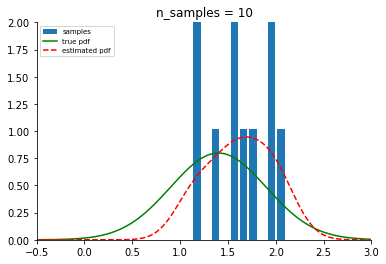

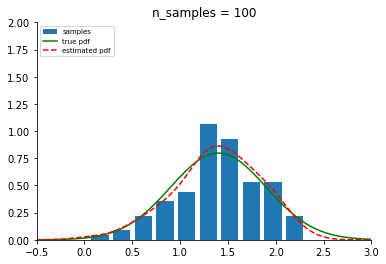

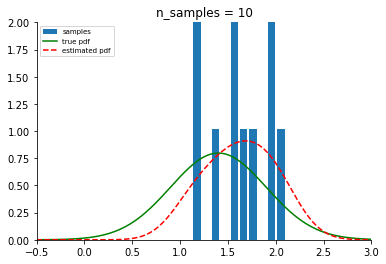

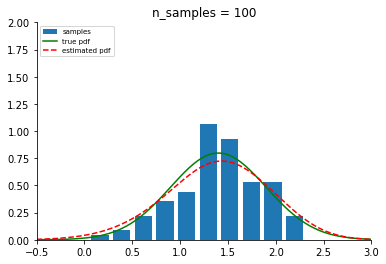

In [10]:
def plot_histogram(size, bw_method=None):
    x = jnp.arange(-0.5, 3, 0.01)
    norm = distrax.Normal(loc=1.4, scale=0.5)
    y = norm.prob(x)
    bw_adjusted = ""
    if bw_method:
        bw_adjusted = "bw_adjusted"

    norm_samples = norm.sample(seed=key, sample_shape=size)
    fig, ax = plt.subplots()
    ax.hist(norm_samples, density=True, stacked=True, rwidth=0.8, label="samples")

    # kde plot
    kde = gaussian_kde(norm_samples, bw_method=bw_method)
    y_estimate = kde(x)

    ax.plot(x, y, "g", label="true pdf")
    ax.plot(x, y_estimate, "r--", label="estimated pdf")
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(0, 2)
    ax.set_title("n_samples = %d" % size)
    ax.legend(loc=2, prop={"size": 7})
    sns.despine()
    pml.savefig(f"mcAccuracyDemo{size}{bw_adjusted}")


for size in [10, 100]:
    plot_histogram(size)
    plt.show()

for size in [10, 100]:
    plot_histogram(size, bw_method=0.75)
    plt.show()

In [11]:
widgets.interact(plot_histogram, size=(5, 1000, 1), bw_method=(0, 2, 0.1))

interactive(children=(IntSlider(value=502, description='size', max=1000, min=5), FloatSlider(value=1.0, descri…

<function __main__.plot_histogram(size, bw_method=None)>